Create a new notebook (CompareAugmentation.ipynb)
Load the 2 models and compare the ROC curves with and without augmentation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Load the 2 models and compare the ROC curves with and without augmentation.

In [ ]:
from tensorflow.keras.models import load_model

# Define the file paths for the saved models
model_without_augmentation_path = "/content/drive/MyDrive/TrainBaseModel.h5"
model_with_augmentation_path = "/content/drive/MyDrive/TrainBaseModelAugmentation.h5"

# Load the models
model_without_augmentation = load_model(model_without_augmentation_path)
model_with_augmentation = load_model(model_with_augmentation_path)

# Now I can use these loaded models for further analysis or evaluation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


# Define paths to my dataset directories
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'

# Create data generators for validation and test data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)


Found 40 images belonging to 6 classes.


In [ ]:
# Make predictions on the test dataset
predictions_without_augmentation = model_without_augmentation.predict(test_generator)
predictions_with_augmentation = model_with_augmentation.predict(test_generator)

2/2 [==============================] - 4s 462ms/step


In [ ]:


from sklearn.metrics import roc_curve, auc

# Number of classes
num_classes = len(test_generator.class_indices)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr = []
all_tpr = []
all_auc = []

# Iterate over each class
for i in range(num_classes):
    # Convert multiclass labels to binary labels for the current class
    binary_labels = (test_generator.classes == i).astype(int)

    # Calculate ROC curve and AUC for the current class
    fpr, tpr, _ = roc_curve(binary_labels, predictions_without_augmentation[:, i])
    roc_auc = auc(fpr, tpr)

    # Append fpr, tpr, and auc to the lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Now I  have ROC curves and AUC for each class
# Now I can plot them or perform further analysis as needed


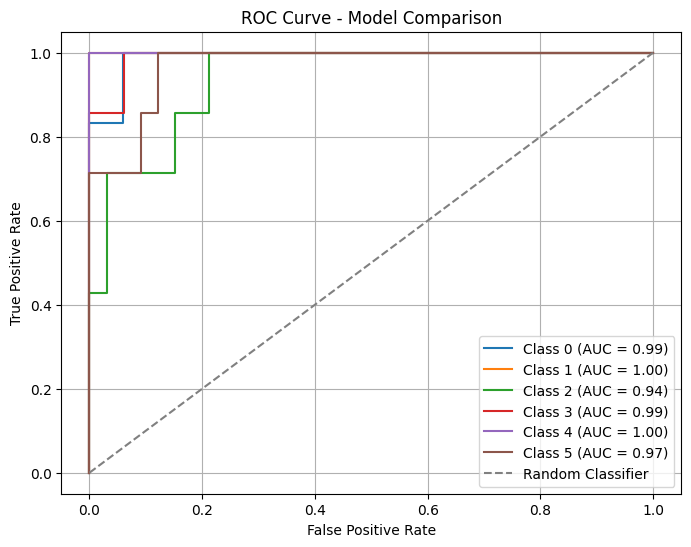

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(all_fpr[i], all_tpr[i], label=f'Class {i} (AUC = {all_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


Comments/Conclusion:

Class 0 (Jellyfish Species 0): AUC = 0.99

This indicates that the model, particularly with augmentation, performs exceptionally well in distinguishing class 0 from other classes. It has a high True Positive Rate (TPR) and a low False Positive Rate (FPR), resulting in a near-perfect classification for this class.

Class 1 (Jellyfish Species 1): AUC = 1.00

AUC of 1.00 implies perfect classification for class 1. The model can accurately distinguish class 1 from other classes without any false positives.

Class 2 (Jellyfish Species 2): AUC = 0.94

While still high, the AUC of 0.94 suggests that the model's performance for class 2 is slightly lower compared to classes 0 and 1. It might have a slightly higher False Positive Rate or lower True Positive Rate for this class.

Class 3 (Jellyfish Species 3): AUC = 0.99

Similar to class 0, class 3 also has an AUC of 0.99, indicating excellent classification performance. The model can effectively distinguish class 3 from other classes.

Class 4 (Jellyfish Species 4): AUC = 1.00
AUC of 1.00 implies perfect classification for class 4, similar to class 1. The model can accurately classify class 4 samples without any false positives.

Class 5 (Jellyfish Species 5): AUC = 0.97

AUC of 0.97 indicates very good classification performance for class 5. While not perfect, the model still performs well in distinguishing class 5 from other classes with a high TPR and relatively low FPR.

Overall, these AUC values suggest that the model, especially with augmentation, performs well across all classes, with some minor variations in performance for specific classes.